## ASSIGNMENT 3

Write a program to demonstrate ART

- the bottom-up weights are used to update existing clusters based on incoming input data.
- the top-down weights are used to create new clusters based on input data that is not sufficiently similar to any existing clusters.
- If the match is greater than the vigilance parameter, the input vector is assigned to the chosen cluster, and the weights for that cluster are updated. If the match is less than the vigilance parameter, a new cluster is created with the input vector as its prototype, and the weights for the new cluster are added to the bottom-up and top-down weight matrices.

In [14]:
import numpy as np
input_array = np.array([[1,1,0,0,0,0,1],[0,0,1,1,1,1,0],[1,0,1,1,1,1,0],[0,0,0,1,1,1,0],[1,1,0,1,1,1,0]])
output = np.full(input_array.shape[0],-1) #the initial value of -1 indicates that no cluster has been assigned yet. 
output_previous = output.copy()
vigilance = 0.7
bottom_up_weights = np.full((1,input_array.shape[1]),1/(1+input_array.shape[1]))
top_down_weights = np.full((1,input_array.shape[1]),1)
while True:
    output_previous = output.copy()
    random_index = np.random.randint(0, input_array.shape[0])
    input = input_array[random_index]
    y = []
    #The activation of each cluster is calculated using the bottom-up weights.
    #The activation is defined as the dot product of the input vector with the corresponding row of the bottom-up weight matrix.
    for i in range(bottom_up_weights.shape[0]):
        y.append((np.sum(input*bottom_up_weights[i]),i))
        #The clusters are sorted in descending order of activation, 
        # and the most activated cluster is chosen for comparison with the input vector.
    y.sort(reverse=True)
    ass = False
    for j in y:
        s=top_down_weights[j[1]]*input
        if(np.sum(s)/np.sum(input) > vigilance):
            top_down_weights[j[1]] = top_down_weights[j[1]] * input
            bottom_up_weights[j[1]] = top_down_weights[j[1]] / (0.5 + np.sum(s))
            output[random_index] = j[1]
            ass = True
            break
            
    if(not ass):
        top_down_weights = np.append(top_down_weights,[input],axis=0)
        bottom_up_weights = np.append(bottom_up_weights,[(top_down_weights[-1] / (0.5 + np.sum(input)))],axis=0)
        output[random_index] = top_down_weights.shape[0]-1
    if((output_previous == output).all() and (output>-1).sum() == output.size):
        break
print(*top_down_weights)
print(*bottom_up_weights)
print("input  ->  cluster")
for k in range(input_array.shape[0]):
    print(input_array[k],"->",output[k])

[0 0 0 1 1 1 0] [1 1 0 1 1 1 0] [1 1 0 0 0 0 1]
[0.         0.         0.         0.28571429 0.28571429 0.28571429
 0.        ] [0.18181818 0.18181818 0.         0.18181818 0.18181818 0.18181818
 0.        ] [0.28571429 0.28571429 0.         0.         0.         0.
 0.28571429]
input  ->  cluster
[1 1 0 0 0 0 1] -> 2
[0 0 1 1 1 1 0] -> 0
[1 0 1 1 1 1 0] -> 0
[0 0 0 1 1 1 0] -> 0
[1 1 0 1 1 1 0] -> 1


In [11]:
bottom_up_weights = np.full((1,input_array.shape[1]),1/(1+input_array.shape[1]))
top_down_weights[-1]

array([1, 0, 0, 1, 1, 1, 0])

## ASSIGNMENT 4

In [4]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

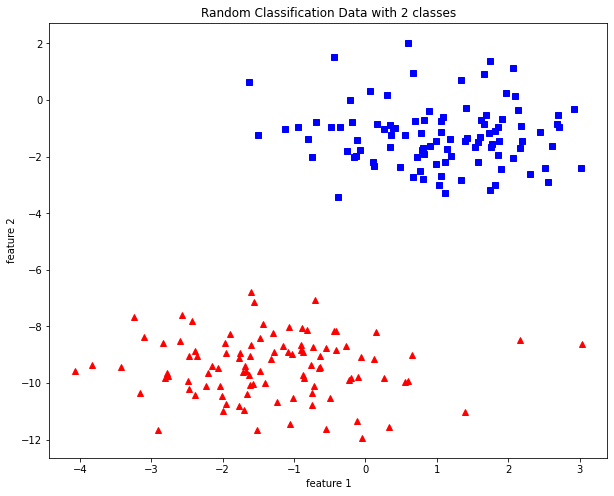

In [5]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=200,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [6]:
X,y

(array([[ 3.50550070e-01, -1.66237773e+00],
        [-5.49094079e-01, -8.74918828e+00],
        [ 1.87274614e+00, -1.43181867e+00],
        [ 1.85412893e+00, -1.95622676e+00],
        [-1.67455485e+00, -9.55966966e+00],
        [-1.88949412e-01, -7.80630648e-01],
        [-2.76985304e+00, -9.74583819e+00],
        [ 2.60959954e-01, -9.83393657e+00],
        [ 1.97173128e+00,  2.48196592e-01],
        [-1.95421438e-01, -9.82692792e+00],
        [ 7.94753304e-01, -1.76534718e+00],
        [-1.40024432e+00, -1.00045583e+01],
        [-1.62140407e+00, -1.00697216e+01],
        [ 8.25539221e-01, -7.17158260e-01],
        [-1.47904469e+00, -9.56255496e+00],
        [ 1.58405209e+00, -1.46629296e+00],
        [ 1.06268230e+00, -7.31215880e-01],
        [ 2.19534770e+00, -1.45327572e+00],
        [ 1.19440189e+00, -1.98887161e+00],
        [-4.44871049e-01,  1.51030196e+00],
        [-6.97774664e-01, -7.68615395e-01],
        [-1.70418884e+00, -1.09352200e+01],
        [ 3.93298869e-01, -9.864

In [7]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

In [8]:
def perceptron(X, y, lr, epochs):
    
   
    m, n = X.shape
    
    # Initializing parapeters(theta) to zeros.
    # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1) # inserting a bias term (x0=1) and reshaping it to a column vector.

            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(x_i.T, theta))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += lr*((y[idx] - y_hat)*x_i)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [9]:
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

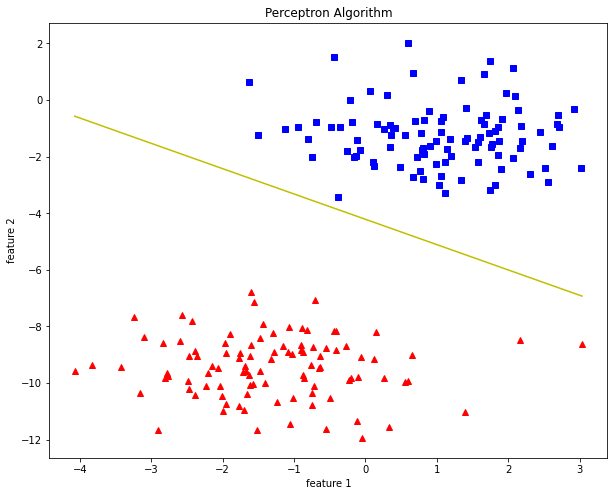

In [10]:
theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)